<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

### This project has been done in cooperation with Shiv, Berenger and Felipe. We didn't simply share each others codes, we brainstormed the ideas about how to do certain problems. Since some of the problems can be done only one way (at least for our level of skills in python), some of the code might be similar.

### I didn't specify references for every code I used, since all of the code I used was from Your notebooks and stackoverflow.

## 1. Load the data from file

---

In [2]:
iowa_path = 'C:/Users/Boris/Desktop/ECON628-01-jokicboris90/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

iowa[0:3]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [4]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [5]:
#Counting the missing values

iowa.isnull().sum().sum()

2854L

In [6]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

We can see that County number and County have equal amount of missing values which means that we are probably missing both of these values for same observations. I will check that by exploring these two columns individually. First we need to rename the columns so that names of the columns don't include space. I will just replace space with _ and use small caps.

In [7]:
iowa.rename(columns={
    'Date':'date',
    'Store Number':'store_number',
    'City':'city',
    'Zip Code':'zip_code',
    'County Number':'county_number', 
    'County':'county', 
    'Category':'category', 
    'Category Name':'category_name', 
    'Vendor Number':'vendor_number', 
    'Item Number':'item_number', 
    'Item Description':'item_description', 
    'Bottle Volume (ml)':'bottle_volume_ml', 
    'State Bottle Cost':'state_bottle_cost', 
    'State Bottle Retail':'state_bottle_retail',
    'Bottles Sold':'bottles_sold', 
    'Sale (Dollars)':'sale_dollars', 
    'Volume Sold (Liters)':'volume_sold_liters',
    'Volume Sold (Gallons)':'volume_sold_gallons'
    }, inplace=True)

In [8]:
iowa.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38


In [9]:
iowa_sorted = iowa.sort(['city', 'county'], ascending=[0,1])
iowa_sorted

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
4976,06/15/2015,4885,ZWINGLE,52079,49.0,Jackson,1031080.0,VODKA 80 PROOF,297,35926,Five O'clock PET Vodka,750,$3.37,$5.06,24,$121.44,18.00,4.76
6594,12/14/2015,4885,ZWINGLE,52079,49.0,Jackson,1012300.0,IRISH WHISKIES,370,15644,Jameson,375,$6.74,$10.11,3,$30.33,1.12,0.30
12535,10/05/2015,4885,ZWINGLE,52079,49.0,Jackson,1031080.0,VODKA 80 PROOF,300,36903,Mccormick Vodka,200,$1.13,$1.70,48,$81.60,9.60,2.54
15360,10/05/2015,4885,ZWINGLE,52079,49.0,Jackson,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,$5.33,$8.00,24,$192.00,9.00,2.38
21035,06/15/2015,4885,ZWINGLE,52079,49.0,Jackson,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,$8.26,$12.39,4,$49.56,3.00,0.79
35597,03/14/2016,4885,ZWINGLE,52079,49.0,Jackson,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,Jagermeister Liqueur,375,$6.52,$9.78,24,$234.72,9.00,2.38
36333,02/01/2016,4885,ZWINGLE,52079,49.0,Jackson,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,3,$51.72,2.25,0.59
37372,05/18/2015,4885,ZWINGLE,52079,49.0,Jackson,1032080.0,IMPORTED VODKA,370,34003,Absolut Swedish Vodka 80 Prf,200,$3.99,$5.99,6,$35.94,1.20,0.32
38674,03/02/2015,4885,ZWINGLE,52079,49.0,Jackson,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,$5.33,$8.00,24,$192.00,9.00,2.38
48660,09/14/2015,4885,ZWINGLE,52079,49.0,Jackson,1062310.0,SPICED RUM,259,43026,Admiral Nelson Spiced Rum,750,$5.78,$8.67,12,$104.04,9.00,2.38


After exploring the missing values of variables county and county number, I concluded that these variables have misssing values for exactly same observations. This could be seen from number of missing observations - both variables have 1077 missing values, but I wanted to make sure that both variables are missing for same observations.

Since these variables are categorical, we can't replace missing values with mean, median or any other value. 

My idea is to assign number and name of the county based on the city, since variable city doesn't have any missing values. For example, if the city is Sumner and that city belongs to county Bremer, any time we have city Sumner and missing value for county, we can conclude that county is Bremer and we should assingn that name of the county and corresponding county number to those missing values. 

Problems with this idea and solutions to those problems:
* By exploring the dataset, I found that there are some cities that belong to 2 counties, so I wouldn't be able to precisely assign the county based on the city, so I will just drop those missing values that belong to those cities. Fortunately, there is only 34 such missing values. First, I explored the dataset by making a table that shows counties per city. Then I wrote down these cities. Next, I counted the number of observations of counties within these cities and compared it to total count of observations of those cities. Difference are missing values of counties within those cities. Next, I located those missing values, dropped them, and proceeded with my idea.
* There are some cities that have all missing values for counties, so we don't know to which county those cities belong. Again, I am simply going to drop these missing values. Fortunately, there is only 12 such missing values.


In [10]:
pd.set_option('display.max_rows', 400)
iowa.groupby(['city', 'county'])[['county_number']].count() 

county_number
city              county                      
ACKLEY            Hardin                    57
                  Webster                   34
ADAIR             Adair                     43
ADEL              Dallas                   318
AFTON             Union                     12
AKRON             Plymouth                  69
ALBIA             Monroe                   342
ALDEN             Hardin                   122
ALGONA            Kossuth                 1025
ALLISON           Butler                    83
ALTA              Buena Vista               14
ALTOONA           Polk                    2104
AMES              Story                   7548
ANAMOSA           Jones                    583
ANITA             Cass                     149
ANKENY            Polk                    4836
ANTHON            Woodbury                 164
ARLINGTON         Fayette                   76
ARMSTRONG         Emmet                     17
ARNOLD'S PARK     Dickinson                242
ARNOLDS PARK      Dickinson                498
ATLANTIC          Cass                    1041
AUDUBON           Audubon                  205
AURELIA           Cherokee                  11
AVOCA             Pottawattamie            457
BALDWIN           Jackson                   26
BANCROFT          Kossuth                  371
BAXTER            Jasper                    58
BEDFORD           Taylor                   157
BELLE PLAINE      Benton                   414
BELLEVUE          Jackson                  238
BELMOND           Wright                   181
BETTENDORF        Iowa                     321
                  Scott                   3388
BEVINGTON         Madison                   74
BLOOMFIELD        Davis                    203
BLUE GRASS        Scott                    425
BONDURANT         Polk                     363
BOONE             Boone                   1443
BRITT             Hancock                  157
BROOKLYN          Poweshiek                194
BUFFALO           Scott                     36
BUFFALO CENTER    Winnebago                151
BURLINGTON        Des Moines              3144
BUSSEY            Marion                    16
CAMANCHE          Clinton                  139
CAMBRIDGE         Polk                      51
CARLISLE          Warren                   182
CARROLL           Carroll                 1480
CARTER LAKE       Pottawattamie            165
CASCADE           Dubuque                  150
CASEY             Guthrie                   37
CEDAR FALLS       Black Hawk              5735
CEDAR RAPIDS      Linn                   18778
CENTER POINT      Linn                     175
CENTERVILLE       Appanoose                976
CENTRAL CITY      Linn                     132
CHARITON          Lucas                    476
CHARLES CITY      Floyd                    825
CHEROKEE          Cherokee                 790
CLARINDA          Page                     511
CLARION           Wright                   166
CLARKSVILLE       Butler                    66
CLEAR LAKE        Cerro Gordo             2083
CLINTON           Clinton                 3084
CLIVE             Dallas                   160
                  Polk                     775
COLFAX            Jasper                   192
COLO              Story                     27
COLUMBUS JUNCTION Louisa                   290
CONRAD            Grundy                    99
COON RAPIDS       Carroll                  118
CORALVILLE        Johnson                 3457
CORNING           Adams                    234
                  Clayton                  210
CORWITH           Hancock                   30
CORYDON           Wayne                    130
COUNCIL BLUFFS    Pottawattamie           8060
CRESCENT          Pottawattamie             26
CRESCO            Howard                   559
CRESTON           Union                   1061
Carroll           Carroll                    1
Cumming           Warren                     6
DAKOTA CITY       Humboldt            

In [11]:
print iowa[iowa["city"]=='ACKLEY'].count()["city"]
print iowa[iowa["city"]=='BETTENDORF'].count()["city"]
print iowa[iowa["city"]=='CLIVE'].count()["city"]
print iowa[iowa["city"]=='CORNING'].count()["city"]
print iowa[iowa["city"]=='FORT DODGE'].count()["city"]
print iowa[iowa["city"]=='NEWTON'].count()["city"]
print iowa[iowa["city"]=='NORTH LIBERTY'].count()["city"]
print iowa[iowa["city"]=='OSKALOOSA'].count()["city"]
print iowa[iowa["city"]=='PERRY'].count()["city"]
print iowa[iowa["city"]=='STATE CENTER'].count()["city"]
print iowa[iowa["city"]=='WEST DES MOINES'].count()["city"]

105
3709
935
444
2989
2544
1321
1516
815
170
7162


In previous 2 cells, I explored the dataset to check which cities belong to more than one county and how many observations for county they have. Then I counted total number of observations for these cities. The logic is: total number of observations for each city minus number of county data points within each city is going to be number of missing observations for counties within the cities. 

Cities that belong to 2 counties are:

    * Ackley             105 total observations   -     91 county data points   =   14 missing values for county
    * Bettendorf        3709 total observations   -   3709 county data points   =    0 missing values for county
    * Clive              935 total observations   -    935 county data points   =    0 missing values for county
    * Corning            444 total observations   -    444 county data points   =    0 missing values for county
    * Fort Dodge        2989 total observations   -   2983 county data points   =    6 missing values for county 
    * Newton            2544 total observations   -   2544 county data points   =    0 missing values for county
    * North Liberty     1321 total observations   -   1307 county data points   =   14 missing values for county
    * Oskaloosa         1516 total observations   -   1516 county data points   =    0 missing values for county
    * Perry              815 total observations   -    815 county data points   =    0 missing values for county
    * State Center       170 total observations   -    170 county data points   =    0 missing values for county
    * West Des Moines   7162 total observations   -   7162 county daya points   =    0 missing values for county
    
    
    TOTAL                                                                       =   34 missing values for county

In [12]:
iowa['county'].fillna("kiko", inplace=True)

iowa.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1077
county                    0
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [13]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
date                   270955 non-null object
store_number           270955 non-null int64
city                   270955 non-null object
zip_code               270955 non-null object
county_number          269878 non-null float64
county                 270955 non-null object
category               270887 non-null float64
category_name          270323 non-null object
vendor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null object
volume_sold_liters     270955 non-null float64
volume_sold_gallons    270955 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 37.2+ MB

In [14]:
iowa = iowa[(iowa['county'] != "kiko") | (iowa['city'] != "ACKLEY")]
iowa = iowa[(iowa['county'] != "kiko") | (iowa['city'] != "FORT DODGE")]
iowa = iowa[(iowa['county'] != "kiko") | (iowa['city'] != "NORTH LIBERTY")]

iowa.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1043
county                    0
category                 68
category_name           630
vendor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [15]:
print iowa[iowa["city"]=='ACKLEY'].count()["city"]
print iowa[iowa["city"]=='BETTENDORF'].count()["city"]
print iowa[iowa["city"]=='CLIVE'].count()["city"]
print iowa[iowa["city"]=='CORNING'].count()["city"]
print iowa[iowa["city"]=='FORT DODGE'].count()["city"]
print iowa[iowa["city"]=='NEWTON'].count()["city"]
print iowa[iowa["city"]=='NORTH LIBERTY'].count()["city"]
print iowa[iowa["city"]=='OSKALOOSA'].count()["city"]
print iowa[iowa["city"]=='PERRY'].count()["city"]
print iowa[iowa["city"]=='STATE CENTER'].count()["city"]
print iowa[iowa["city"]=='WEST DES MOINES'].count()["city"]

91
3709
935
444
2983
2544
1307
1516
815
170
7162


In [16]:
iowa.replace("kiko", np.nan, inplace=True)
iowa.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1043
county                 1043
category                 68
category_name           630
vendor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

We can see that exactly 34 observations are dropped (we had 1077, now we have 1043), which means that it worked. 
Now we can do the final step for replacing the values for counties and that is replacing the missing values with first non-missing value in group (in city).

In [17]:
iowa['county'] = iowa.groupby('city')['county'].transform('first')
iowa['county_number'] = iowa.groupby('city')['county_number'].transform('first')

iowa.isnull().sum()

date                     0
store_number             0
city                     0
zip_code                 0
county_number           12
county                  12
category                68
category_name          630
vendor_number            0
item_number              0
item_description         0
bottle_volume_ml         0
state_bottle_cost        0
state_bottle_retail      0
bottles_sold             0
sale_dollars             0
volume_sold_liters       0
volume_sold_gallons      0
dtype: int64

In previous cell I did what I planned. I grouped the data by the city. Then I replaced missing values with first non-zero value by group (city) for county and county number. Now number of missing values for county and county number went from 1077 to 12. These 12 missing values are for cities (groups) that don't have any non-zero values for county and county number.

I wanted to make sure that we are talking about same categories, so I checked if category number matches category name. Now I am going to do same thing I did for missing values for counties. Since category has 68 missing values and category name has 632 missing values, I am going to group them by variable with less missing values, which is "category". Then I will replace missing values for category name with first non-missing value from the group, based on category number.`

In [18]:
iowa.category.fillna(0, inplace=True)
iowa.isnull().sum()

date                     0
store_number             0
city                     0
zip_code                 0
county_number           12
county                  12
category                 0
category_name          630
vendor_number            0
item_number              0
item_description         0
bottle_volume_ml         0
state_bottle_cost        0
state_bottle_retail      0
bottles_sold             0
sale_dollars             0
volume_sold_liters       0
volume_sold_gallons      0
dtype: int64

In [19]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270921 entries, 0 to 270954
Data columns (total 18 columns):
date                   270921 non-null object
store_number           270921 non-null int64
city                   270921 non-null object
zip_code               270921 non-null object
county_number          270909 non-null float64
county                 270909 non-null object
category               270921 non-null float64
category_name          270291 non-null object
vendor_number          270921 non-null int64
item_number            270921 non-null int64
item_description       270921 non-null object
bottle_volume_ml       270921 non-null int64
state_bottle_cost      270921 non-null object
state_bottle_retail    270921 non-null object
bottles_sold           270921 non-null int64
sale_dollars           270921 non-null object
volume_sold_liters     270921 non-null float64
volume_sold_gallons    270921 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 39.3+ MB

In [20]:
iowa = iowa[iowa.category !=0]
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270853 entries, 0 to 270954
Data columns (total 18 columns):
date                   270853 non-null object
store_number           270853 non-null int64
city                   270853 non-null object
zip_code               270853 non-null object
county_number          270841 non-null float64
county                 270841 non-null object
category               270853 non-null float64
category_name          270291 non-null object
vendor_number          270853 non-null int64
item_number            270853 non-null int64
item_description       270853 non-null object
bottle_volume_ml       270853 non-null int64
state_bottle_cost      270853 non-null object
state_bottle_retail    270853 non-null object
bottles_sold           270853 non-null int64
sale_dollars           270853 non-null object
volume_sold_liters     270853 non-null float64
volume_sold_gallons    270853 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 39.3+ MB

In [21]:
iowa.isnull().sum()

date                     0
store_number             0
city                     0
zip_code                 0
county_number           12
county                  12
category                 0
category_name          562
vendor_number            0
item_number              0
item_description         0
bottle_volume_ml         0
state_bottle_cost        0
state_bottle_retail      0
bottles_sold             0
sale_dollars             0
volume_sold_liters       0
volume_sold_gallons      0
dtype: int64

In [22]:
iowa.category = [int(float(x)) for x in iowa.category]

In [23]:
iowa['category_name'] = iowa.groupby('item_number')['category_name'].transform('first')
iowa.isnull().sum()


date                    0
store_number            0
city                    0
zip_code                0
county_number          12
county                 12
category                0
category_name          10
vendor_number           0
item_number             0
item_description        0
bottle_volume_ml        0
state_bottle_cost       0
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
volume_sold_gallons     0
dtype: int64

In [24]:
iowa.dropna(axis=0, inplace=True)
iowa.isnull().sum()


date                   0
store_number           0
city                   0
zip_code               0
county_number          0
county                 0
category               0
category_name          0
vendor_number          0
item_number            0
item_description       0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
dtype: int64

In [25]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 18 columns):
date                   270831 non-null object
store_number           270831 non-null int64
city                   270831 non-null object
zip_code               270831 non-null object
county_number          270831 non-null float64
county                 270831 non-null object
category               270831 non-null int64
category_name          270831 non-null object
vendor_number          270831 non-null int64
item_number            270831 non-null int64
item_description       270831 non-null object
bottle_volume_ml       270831 non-null int64
state_bottle_cost      270831 non-null object
state_bottle_retail    270831 non-null object
bottles_sold           270831 non-null int64
sale_dollars           270831 non-null object
volume_sold_liters     270831 non-null float64
volume_sold_gallons    270831 non-null float64
dtypes: float64(3), int64(6), object(9)
memory usage: 39.3+ MB


### 3.2 Clean the columns

In [26]:
# Getting rid of the $ and converting the variables to appropriate type and format

iowa['state_bottle_cost'] = iowa['state_bottle_cost'].map(lambda x: x.lstrip('$'))
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].map(lambda x: x.lstrip('$'))
iowa['sale_dollars'] = iowa['sale_dollars'].map(lambda x: x.lstrip('$'))

iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 18 columns):
date                   270831 non-null object
store_number           270831 non-null int64
city                   270831 non-null object
zip_code               270831 non-null object
county_number          270831 non-null float64
county                 270831 non-null object
category               270831 non-null int64
category_name          270831 non-null object
vendor_number          270831 non-null int64
item_number            270831 non-null int64
item_description       270831 non-null object
bottle_volume_ml       270831 non-null int64
state_bottle_cost      270831 non-null object
state_bottle_retail    270831 non-null object
bottles_sold           270831 non-null int64
sale_dollars           270831 non-null object
volume_sold_liters     270831 non-null float64
volume_sold_gallons    270831 non-null float64
dtypes: float64(3), int64(6), object(9)
memory usage: 39.3+ MB


In [27]:
iowa.state_bottle_cost = [float(str(x)) for x in iowa.state_bottle_cost]
iowa.state_bottle_retail = [float(str(x)) for x in iowa.state_bottle_retail]
iowa.sale_dollars = [float(str(x)) for x in iowa.sale_dollars]
iowa.county_number = [int(float(x)) for x in iowa.county_number]

iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 18 columns):
date                   270831 non-null object
store_number           270831 non-null int64
city                   270831 non-null object
zip_code               270831 non-null object
county_number          270831 non-null int64
county                 270831 non-null object
category               270831 non-null int64
category_name          270831 non-null object
vendor_number          270831 non-null int64
item_number            270831 non-null int64
item_description       270831 non-null object
bottle_volume_ml       270831 non-null int64
state_bottle_cost      270831 non-null float64
state_bottle_retail    270831 non-null float64
bottles_sold           270831 non-null int64
sale_dollars           270831 non-null float64
volume_sold_liters     270831 non-null float64
volume_sold_gallons    270831 non-null float64
dtypes: float64(5), int64(7), object(6)
memory usage: 39.3+ MB



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

Since I already did what I consider the extensive cleaning of the dataset (converting the columns to appropriate data types, renaming the variables, "saving" as many missing values as possible by mapping them based on values of other variables), except getting rid of outliers, I will explore the distribution of variables and clean the dataset in terms of outliers.

In [28]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='red', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':1})

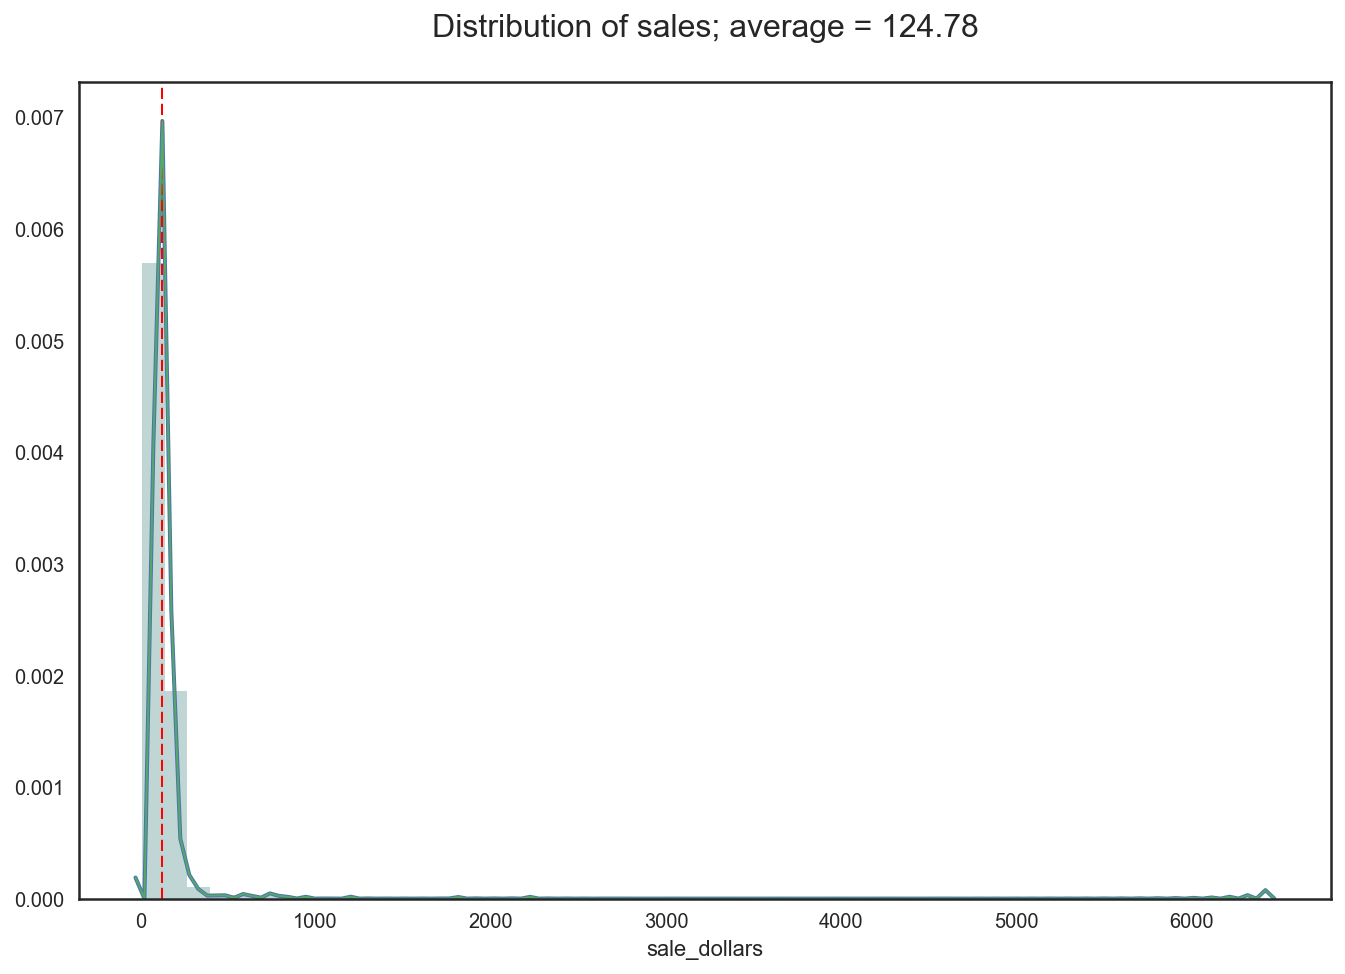

In [29]:
histogram_plotter("sales", iowa.groupby('store_number')['sale_dollars'].mean())

We have a lot of outliers in terms of sales per store. Distribution is very skewed on the right. Let's see what happens if we restrict the data.

In [30]:
iowa_res = iowa[(iowa.sale_dollars)<500]

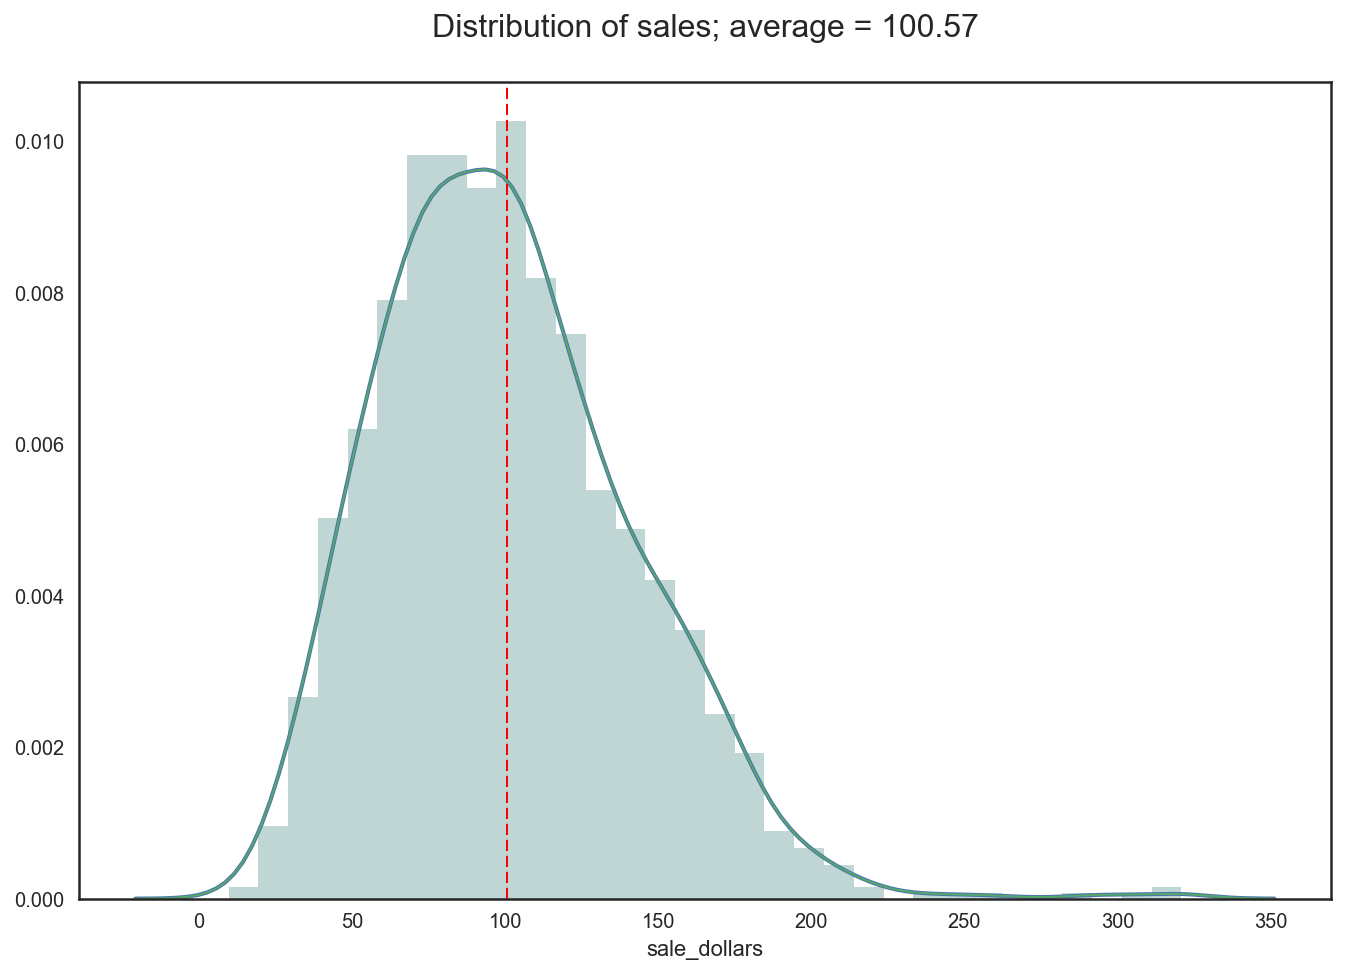

In [31]:
histogram_plotter("sales", iowa_res.groupby('store_number')['sale_dollars'].mean())

I did only histograms because we can't see much from boxplots, because distribution is too skewed to right, so outliers are too severe.

Since sales in dollars are directly affected by volume sold in gallons or liters, we need to explore only one of these variables. So I explored sales in dollars and eliminated some of the outliers such that distribution is closer to normal. But, in further analysis, I will keep all the outliers, since we need to restrict the data too much on order to get somewhat normal distribution. Also, I wouldn't do normalization for sake of interpretation.


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [32]:
iowa['date'] = pd.to_datetime(iowa['date'])
iowa['month'] = iowa['date'].dt.month
iowa['year']=iowa['date'].dt.year

In [33]:
iowa15= iowa[(iowa.year == 2015)]

Here I made new data frame that contains only data for 2015.

In [34]:
iowa15_ind = iowa15.set_index(['store_number'])
iowa15_ind.sort_index(axis=0, level=None, ascending=True)
iowa15_ind['MONTHS'] = iowa15_ind.groupby(level=0)['month'].apply(lambda x: x.max()-x.min() +1)
iowa15_ind.sort_index(axis=0, level=None, ascending=True)

,date,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,MONTHS
store_number,,,,,,,,,,,,,,,,,,,,
2106,2015-07-23,CEDAR FALLS,50613,7,Black Hawk,1012300,IRISH WHISKIES,370,15627,Jameson,1000,18.49,27.74,24,665.76,24.00,6.34,7,2015,12
2106,2015-08-20,CEDAR FALLS,50613,7,Black Hawk,1032200,IMPORTED VODKA - MISC,395,34972,Three Olives Cherry Vodka,750,9.96,14.94,12,179.28,9.00,2.38,8,2015,12
2106,2015-01-22,CEDAR FALLS,50613,7,Black Hawk,1051010,AMERICAN GRAPE BRANDIES,259,902929,Christian Bros White Frost Brandy,750,6.63,9.95,60,597.00,45.00,11.89,1,2015,12
2106,2015-09-17,CEDAR FALLS,50613,7,Black Hawk,1081390,IMPORTED SCHNAPPS,421,69637,Dr. Mcgillicuddy's Cherry Schnapps,1000,11.00,16.50,24,396.00,24.00,6.34,9,2015,12
2106,2015-04-30,CEDAR FALLS,50613,7,Black Hawk,1081317,GRAPE SCHNAPPS,65,82636,Dekuyper Grape Pucker Schnapps,750,6.30,9.45,12,113.40,9.00,2.38,4,2015,12
2106,2015-08-13,CEDAR FALLS,50613,7,Black Hawk,1062200,PUERTO RICO & VIRGIN ISLANDS RUM,35,43126,Bacardi Superior Rum,750,8.26,12.39,12,148.68,9.00,2.38,8,2015,12
2106,2015-03-12,CEDAR FALLS,50613,7,Black Hawk,1032200,IMPORTED VODKA - MISC,434,35699,Pearl Cucumber Vodka,750,7.86,11.79,12,141.48,9.00,2.38,3,2015,12
2106,2015-01-15,CEDAR FALLS,50613,7,Black Hawk,1031080,VODKA 80 PROOF,55,35317,Barton Vodka,1000,3.97,5.96,120,715.20,120.00,31.70,1,2015,12
2106,2015-06-18,CEDAR FALLS,50613,7,Black Hawk,1012210,SINGLE MALT SCOTCH,420,905067,Glenmorangie Signet HA,750,100.00,150.00,2,300.00,1.50,0.40,6,2015,12


In [35]:
iowa15_store_months = iowa15_ind[['MONTHS']]
iowa15_store_months.sort_index(axis=0, level=None, ascending=True)
iowa15_store_months.groupby(level=0)['MONTHS'].mean()

store_number
2106    12
2113    12
2130    12
2152    12
2178    12
2190    12
2191    12
2200    12
2205    12
2228    12
2233    12
2238    11
2248    12
2285    12
2290    12
2327    12
2353    12
2367     6
2413    12
2445    12
2448    12
2459    12
2460    12
2465    12
2475    12
2478    12
2487    11
2498    12
2500    12
2501    12
2502    12
2505    12
2506    12
2507    12
2508    12
2509    12
2512    12
2513    12
2514    12
2515    12
2517    12
2518    12
2521    12
2522    12
2523    12
2524    12
2527    12
2528    12
2529    12
2532    12
2535    12
2536    12
2538    12
2539    12
2543    12
2544    12
2545    12
2548    12
2549    12
2550    12
2551    12
2552    12
2553    12
2554    12
2555    12
2556    12
2558    12
2559    12
2560    12
2561    12
2562    12
2564    12
2565    12
2566    12
2567    12
2568    12
2569    12
2571    12
2572    12
2573    12
2575    12
2576    12
2578    12
2579    12
2582    12
2584    12
2585    12
2587    12
2588    12
2590    

This is the list of the stores with number of months they were operating in 2015. I got these values by taking the difference between maximum and minimum value for month within a group (store_number) + 1. For example, if store has data for month 1 and month 12, number of months operating in 2015 will be 12-1+1 = 12.

Problem:
This is a useful information if we want to know if store was open through whole 2015, but it doesn't deal with inconsistency in reporting. For example, some stores have data for 1st, 3rd and 12th month of 2015 and we are reporting this as 12 months even though we don't have data for each month.

Solution:
I am going to make a new variable that is going to count unique values of months within group (store_number). This way, we will  report how many months we really have data for. For example, if we have data for 1st and 12th month only, it will not report 12 months, it will report 2 months.

In [36]:
for_merge = iowa15.groupby(['store_number', 'year'])['month'].nunique().reset_index()

Here I created mini dataframe - number of months using previously desribed idea of unique values. I kept store number and and year as identifiers when I merge this with whole dataset.

In [37]:
iowa15.rename(columns={
  'month':'month_of_year'  
   }, inplace=True)

C:\Users\Boris\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


I had to rename variable in original dataframe because it has same value in original dataframe as in mini dataframe for merging.
Variable month_of_year represents just month of year and variable month represents number of months operating in 2015 for each store.

In [38]:
iowa15 = pd.merge(iowa15, for_merge, on=['store_number', 'year'], how='right')
iowa15

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.00,2.38,11,2015,12
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,4,27.00,3.00,0.79,6,2015,12
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,750,10.00,15.00,2,30.00,1.50,0.40,1,2015,12
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,1000,6.63,9.95,2,19.90,2.00,0.53,11,2015,12
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,750,16.79,25.19,1,25.19,0.75,0.20,1,2015,12
5,2015-02-18,3717,SUMNER,50674,9,Bremer,1012300,IRISH WHISKIES,370,15621,...,600,11.88,17.82,1,17.82,0.60,0.16,2,2015,12
6,2015-08-19,3717,SUMNER,50674,9,Bremer,1062300,FLAVORED RUM,65,44520,...,750,6.83,10.25,1,10.25,0.75,0.20,8,2015,12
7,2015-12-09,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,260,11296,...,750,15.00,22.50,2,45.00,1.50,0.40,12,2015,12
8,2015-02-04,3717,SUMNER,50674,9,Bremer,1081200,CREAM LIQUEURS,305,80482,...,500,7.42,11.13,1,11.13,0.50,0.13,2,2015,12
9,2015-12-22,3717,SUMNER,50674,9,Bremer,1031200,VODKA FLAVORED,380,41694,...,1000,7.50,11.25,5,56.25,5.00,1.32,12,2015,12


Because of difference in variation, I would restrict the dataset for further analysis on stores that were operating more than, for example, 5 months. This way, I am solving the problem of too little variation within some stores. This could also be done by simply defining the condition of month>5 every time when we do some kind of analysis, like a regression, for example. But, since we are not running any regressions and similar, I will just drop those observations - stores that were operating for less than 6 months to formalize implementation of my plan.

In [39]:
iowa15_restricted= iowa15[(iowa15.month >5)]
iowa15_restricted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215403 entries, 0 to 218476
Data columns (total 21 columns):
date                   215403 non-null datetime64[ns]
store_number           215403 non-null int64
city                   215403 non-null object
zip_code               215403 non-null object
county_number          215403 non-null int64
county                 215403 non-null object
category               215403 non-null int64
category_name          215403 non-null object
vendor_number          215403 non-null int64
item_number            215403 non-null int64
item_description       215403 non-null object
bottle_volume_ml       215403 non-null int64
state_bottle_cost      215403 non-null float64
state_bottle_retail    215403 non-null float64
bottles_sold           215403 non-null int64
sale_dollars           215403 non-null float64
volume_sold_liters     215403 non-null float64
volume_sold_gallons    215403 non-null float64
month_of_year          215403 non-null int64
year      


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [40]:
sales_2015 = iowa15.groupby(["store_number"]).sum()["sale_dollars"].reset_index()
sales_2015.rename(columns={
  'sale_dollars':'sale_year'  
   }, inplace=True)
iowa15= pd.merge(iowa15, sales_2015, on=['store_number'], how='right')
iowa15.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.5,6.75,12,81.0,9.0,2.38,11,2015,12,9022.86


In [41]:
sales = iowa15[['store_number', 'sale_year']]
sales = sales.groupby(['store_number'])['sale_year'].mean()
sales.head(5)

store_number
2106    146326.22
2113      9310.22
2130    111871.43
2152      7721.08
2178     24324.18
Name: sale_year, dtype: float64

I displayed only first 5 observations, just to save some space in my notebook. Calculation for whole dataset is included in new column "sale_year". 

Note: why did I use mean when grouping by store? - Because each store has repeated same values for yearly sales, so each value within a store is equal to each other which is further equal to mean.

### 5.2 Calculate the profit each store is making in 2015.


In [42]:
iowa15['total_cost'] = iowa15['state_bottle_cost'] * iowa15['bottles_sold']
iowa15['profit'] = iowa15['sale_dollars'] - iowa15['total_cost']
iowa15.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,12,81.0,9.0,2.38,11,2015,12,9022.86,54.0,27.0


In [43]:
profit_2015 = iowa15.groupby(["store_number"]).sum()["profit"].reset_index()
profit_2015.rename(columns={
  'profit':'profit_year'  
   }, inplace=True)
iowa15= pd.merge(iowa15, profit_2015, on=['store_number'], how='right')
iowa15.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit,profit_year
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,81.0,9.0,2.38,11,2015,12,9022.86,54.0,27.0,3011.02


In [44]:
profit = iowa15[['store_number', 'profit_year']]
profit = profit.groupby(['store_number'])['profit_year'].mean()
profit.head(5)

store_number
2106    48838.08
2113     3109.04
2130    37325.20
2152     2587.53
2178     8165.70
Name: profit_year, dtype: float64

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [45]:
iowa15['profit_per_gallon'] = iowa15['profit'] / iowa15['volume_sold_gallons']

profit_g_county = iowa15.groupby(["county"]).mean()["profit_per_gallon"].reset_index()
profit_g_county.rename(columns={
  'profit_per_gallon':'profit_g_county'  
   }, inplace=True)
iowa15= pd.merge(iowa15, profit_g_county, on=['county'], how='right')

In [46]:
profit_county = iowa15[['county', 'profit_g_county']]
profit_county = profit_county.groupby(['county'])['profit_g_county'].mean()
profit_county.sort(['profit_g_county'], ascending=0, inplace=True)

profit_county.head(5)

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


county
Polk           24.788220
Johnson        24.394360
Jefferson      24.131455
Scott          24.046309
Buena Vista    23.700354
Name: profit_g_county, dtype: float64

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [47]:
store_size = iowa15.groupby(["store_number"]).sum()["volume_sold_gallons"].reset_index()
store_size.rename(columns={
  'volume_sold_gallons':'store_size'  
   }, inplace=True)
iowa15= pd.merge(iowa15, store_size, on=['store_number'], how='right')

In [48]:
iowa15['profit/size'] = iowa15['profit_year'] / iowa15['store_size']

In [49]:
iowa15[['profit/size','store_size']].corr()

,profit/size,store_size
profit/size,1.000000,0.171975
store_size,0.171975,1.000000


In [50]:
p = iowa15.groupby(['store_number'])[['store_size','profit/size']].mean()
p.sort(['store_size', 'profit/size'], ascending=[1,1])

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,store_size,profit/size
store_number,,
5053,0.20,112.500000
5215,0.48,38.916667
4567,0.79,19.063291
5205,0.93,14.344086
4939,1.15,15.486957
5192,1.19,25.210084
5056,1.81,32.176796
5175,2.05,36.580488
5201,2.28,42.390351


Based on correlation coefficient, we can say that there is a very weak positive correlation between store size and profit/size ratio. 
By simply sorting these values and listing them, we can't see any pattern.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [51]:
iowa15['category_new'] = np.where(iowa15['category_name'].str.contains('WHISK'), "Whisky",
        np.where(iowa15['category_name'].str.contains('BRANDY') , "Brandy",
        np.where(iowa15['category_name'].str.contains('SCHNAPP'), "Schnapps",  
        np.where(iowa15['category_name'].str.contains('VODKA'), "Vodka", "Other" ))))

iowa15.groupby(['category_new']).count()['category'].reset_index()

,category_new,category
0,Other,84033
1,Schnapps,12153
2,Vodka,56564
3,Whisky,65771


### 5.6 Do relationships exist between the broader liquor type and profit?

In [52]:
# Making variable profit per gallon per type of product

profit_g_type = iowa15.groupby(['category_new']).mean()["profit_per_gallon"].reset_index()
profit_g_type.rename(columns={
  'profit_per_gallon':'profit_g_type'  
   }, inplace=True)
iowa15= pd.merge(iowa15, profit_g_type, on=['category_new'], how='right')


# Making variable gross profit per type of product 

profit_type = iowa15.groupby(['category_new']).sum()["profit"].reset_index()
profit_type.rename(columns={
  'profit':'profit_type'  
   }, inplace=True)
iowa15= pd.merge(iowa15, profit_type, on=['category_new'], how='right')


# Making variable gallons sold per type

gallons_per_type = iowa15.groupby(['category_new']).sum()[['volume_sold_gallons']]

# Displaying gross and per galon profits per type of product

profits_per_type = iowa15.groupby(['category_new']).mean()[['profit_type', 'profit_g_type']]
profits_per_type.sort(['profit_type'], ascending=1, inplace=True)
profits_per_type

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,profit_type,profit_g_type
category_new,,
Schnapps,3.560461e+05,17.905428
Vodka,2.281063e+06,18.217309
Whisky,3.367232e+06,24.953995
Other,3.529312e+06,24.749709


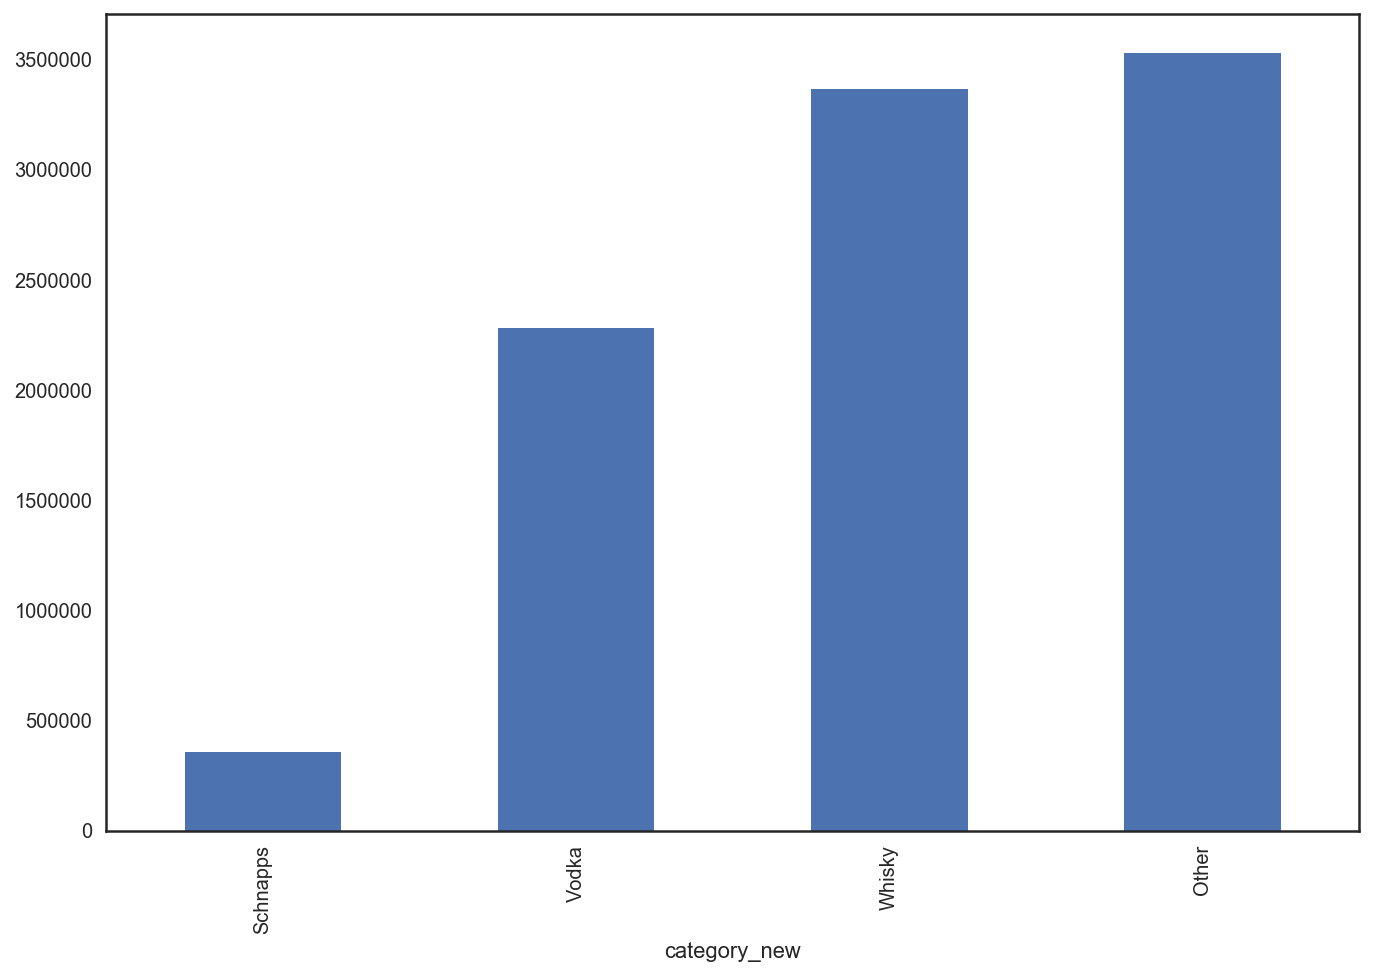

In [53]:
profits_per_type['profit_type'].plot(kind='bar')

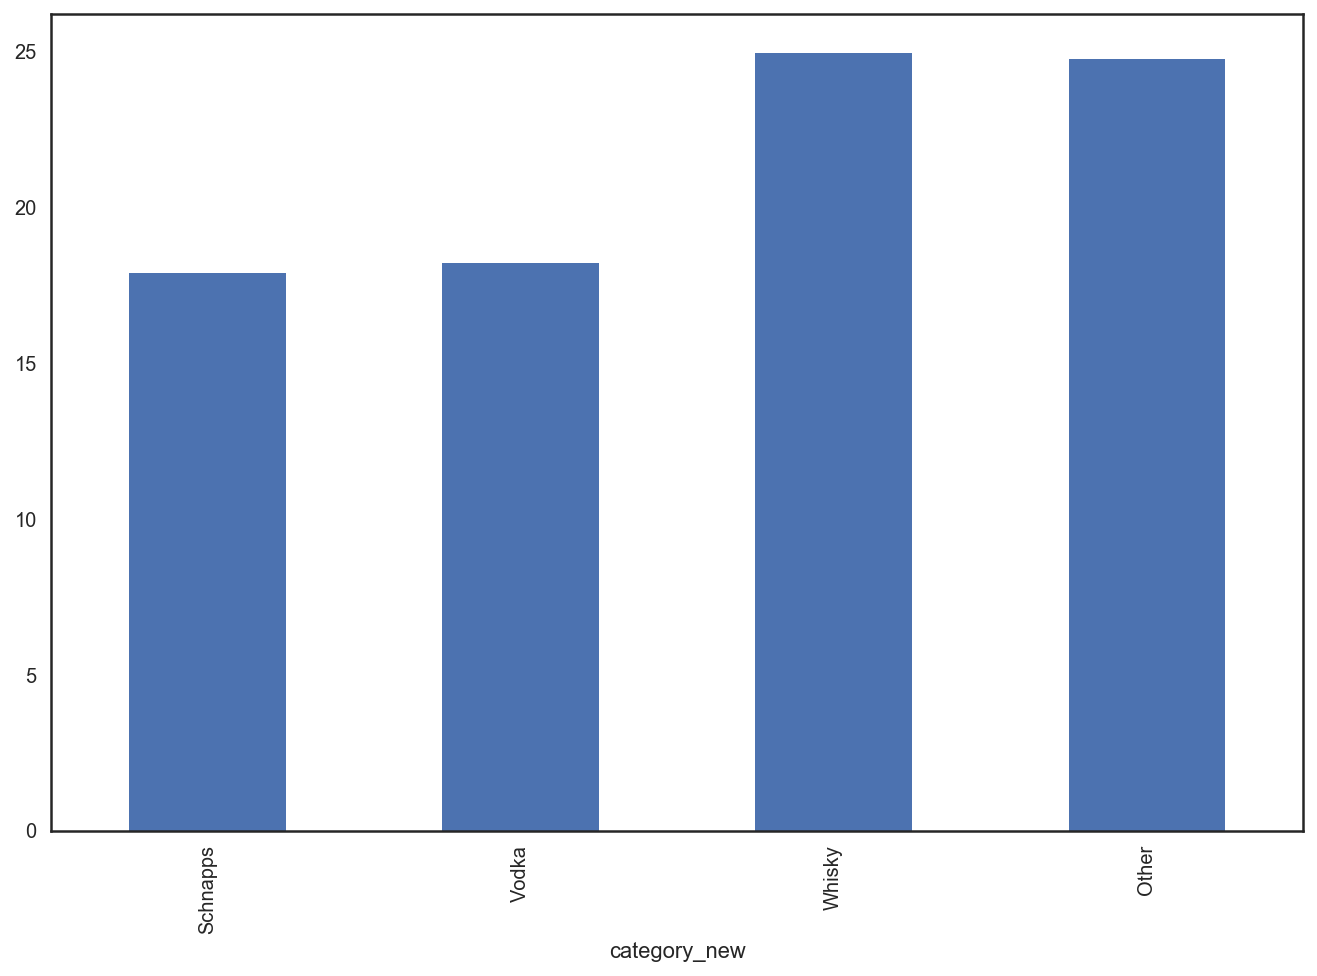

In [54]:
profits_per_type['profit_g_type'].plot(kind='bar')

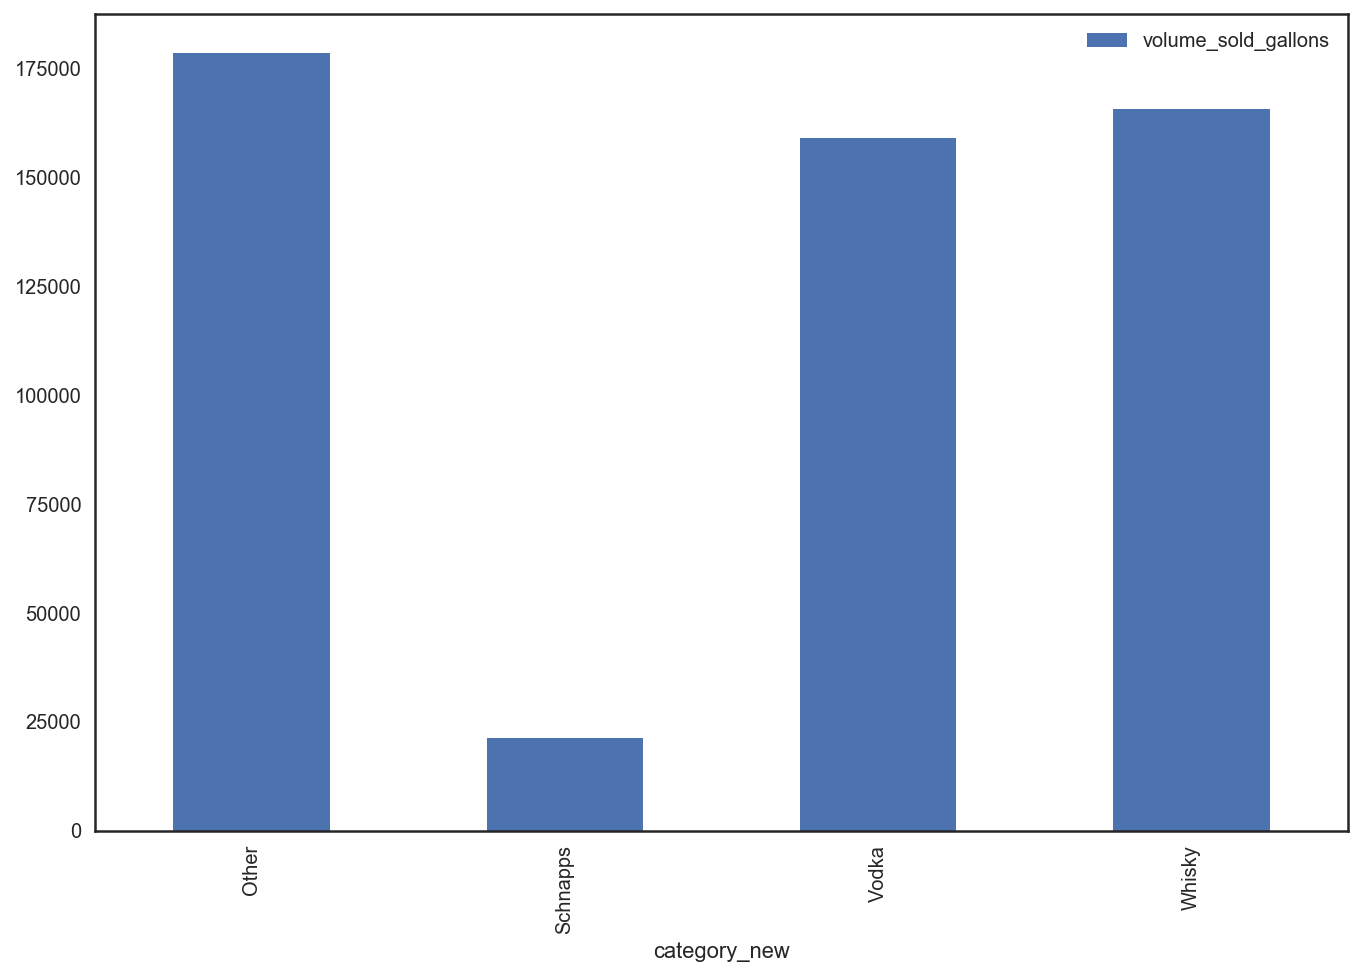

In [55]:
gallons_per_type.plot(kind='bar')

I did analysis for both gross profits per type of product and profits per gallon per type of product. Reason for this is that they might be very different in terms of sales in gallons, so I wanted to analyze both profit per unit and total profit. Here we can see that, for example, schnapps are equaly profitable as vodka in terms of profit per unit, but vodka has much higher gross profit, as a result of much more gallons sold.

In terms of difference between these new categories, shnapps and vodka are equally profitable per gallon and whiskey and other is equally profitable per gallon, but whiskey and other are much more profitable per gallon compared to schnapps and vodka.
In therms of gross profits, whiskey and other earned around the same profit and they earned much more than vodka. Schnapps earned the least in terms of gross profit.


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

First I am making a new variable "brand" that will be the first word of "item description"

In [56]:
iowa15['brand'] = iowa15['item_description'].str.extract('([A-Z]\w{0,})', expand=True)

Now I am doing analysis for average sales per brand.

In [59]:
sales = iowa15.groupby(['brand'])['sale_dollars'].mean().reset_index()
sales.rename(columns={
'sale_dollars':'sales_brand'  
}, inplace=True)

sales.sort(['sales_brand'], ascending=0)

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,brand,sales_brand
355,Member,4334.811429
354,Medea,3221.640000
246,Hacienda,936.360000
122,Chartreuse,840.600000
59,Big,752.928000
425,Pride,709.280000
248,Hakushu,619.102500
416,Pirassunga,587.160000
124,Chick,575.320000
56,Benedictine,526.500000


Now I am doing analysis for average profits per brand.

In [61]:
profits = iowa15.groupby(['brand'])['profit'].mean().reset_index()
profits.rename(columns={
'profit':'profit_brand'  
}, inplace=True)

profits.sort(['profit_brand'], ascending=0)

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,brand,profit_brand
355,Member,1444.937143
354,Medea,1073.880000
246,Hacienda,312.120000
122,Chartreuse,280.260000
59,Big,251.160000
425,Pride,236.600000
248,Hakushu,206.367500
416,Pirassunga,195.480000
124,Chick,191.900000
56,Benedictine,175.500000


We can see that there are big differences between brands in terms of both sales and profits.

Now I will check is there a difference in profits between brands within product type. I will check it for Vodka.

In [64]:
vodka= iowa15[(iowa15.category_new == "Vodka")]

In [67]:
profits_vodka = vodka.groupby(['brand'])['profit'].mean().reset_index()
profits_vodka.rename(columns={
'profit':'profit_brand'  
}, inplace=True)

profits_vodka.sort(['profit_brand'], ascending=0)

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,brand,profit_brand
47,Member,1632.000000
46,Medea,1073.880000
65,Pride,236.600000
9,Chick,191.900000
35,Jinro,160.000000
53,North,149.730000
39,Kru,119.302500
69,Relska,107.700000
41,Luksusowa,104.440000
62,Platinum,90.983008


Again, we can see that there is a big variation in profits of different brands of vodka.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Since size is highly correlated with sales, we can introduce a tax that would be percentage of every dollar of sales. This way, everyone will be included in taxation, but bigger stores are going to pay more in absolute values.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [83]:
iowa16= iowa[(iowa.year == 2016)]

Next, I will apply same steps I appled on iowa15. I will not explain it, since it has already been explained

In [84]:
iowa16_ind = iowa16.set_index(['store_number'])
iowa16_ind.sort_index(axis=0, level=None, ascending=True)
iowa16_ind['MONTHS'] = iowa16_ind.groupby(level=0)['month'].apply(lambda x: x.max()-x.min() +1)
iowa16_ind.sort_index(axis=0, level=None, ascending=True)

# Step 1

for_merge16 = iowa16.groupby(['store_number', 'year'])['month'].nunique().reset_index()
iowa16.rename(columns={
  'month':'month_of_year'  
   }, inplace=True)
iowa16 = pd.merge(iowa16, for_merge16, on=['store_number', 'year'], how='right')

# Step 2

sales_2016 = iowa16.groupby(["store_number"]).sum()["sale_dollars"].reset_index()
sales_2016.rename(columns={
  'sale_dollars':'sale_year'  
   }, inplace=True)
iowa16= pd.merge(iowa16, sales_2016, on=['store_number'], how='right')

# Step 3

iowa16['total_cost'] = iowa16['state_bottle_cost'] * iowa16['bottles_sold']
iowa16['profit'] = iowa16['sale_dollars'] - iowa16['total_cost']
profit_2016 = iowa16.groupby(["store_number"]).sum()["profit"].reset_index()
profit_2016.rename(columns={
  'profit':'profit_year'  
   }, inplace=True)
iowa16= pd.merge(iowa16, profit_2016, on=['store_number'], how='right')

#Step 4

iowa16['profit_per_gallon'] = iowa16['profit'] / iowa16['volume_sold_gallons']
profit_g_county16 = iowa16.groupby(["county"]).mean()["profit_per_gallon"].reset_index()
profit_g_county16.rename(columns={
  'profit_per_gallon':'profit_g_county'  
   }, inplace=True)
iowa16= pd.merge(iowa16, profit_g_county16, on=['county'], how='right')

#Step 5

store_size16 = iowa16.groupby(["store_number"]).sum()["volume_sold_gallons"].reset_index()
store_size16.rename(columns={
  'volume_sold_gallons':'store_size'  
   }, inplace=True)
iowa16= pd.merge(iowa16, store_size16, on=['store_number'], how='right')


# Step 6

iowa16['profit/size'] = iowa16['profit_year'] / iowa16['store_size']


iowa16['category_new'] = np.where(iowa16['category_name'].str.contains('WHISK'), "Whisky",
        np.where(iowa16['category_name'].str.contains('BRANDY') , "Brandy",
        np.where(iowa16['category_name'].str.contains('SCHNAPP'), "Schnapps",  
        np.where(iowa16['category_name'].str.contains('VODKA'), "Vodka", "OTHER" ))))

# Step 7

profit_g_type16 = iowa16.groupby(['category_new']).mean()["profit_per_gallon"].reset_index()
profit_g_type16.rename(columns={
  'profit_per_gallon':'profit_g_type'  
   }, inplace=True)
iowa16= pd.merge(iowa16, profit_g_type16, on=['category_new'], how='right')

# Step 8

profit_type16 = iowa16.groupby(['category_new']).sum()["profit"].reset_index()
profit_type16.rename(columns={
  'profit':'profit_type'  
   }, inplace=True)
iowa16= pd.merge(iowa16, profit_type, on=['category_new'], how='right')

In [85]:
pd.set_option('display.max_columns', 500)


iowa16.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_g_county,store_size,profit/size,category_new,profit_g_type,profit_type
0,2016-03-02,2614.0,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395.0,27605.0,Tin Cup,750.0,13.75,20.63,2.0,41.26,1.5,0.4,3.0,2016.0,3.0,39097.17,27.5,13.76,13043.36,34.4,24.196989,836.99,15.583651,Whisky,25.320463,3.367232e+06


In [86]:
pd.set_option('display.max_columns', 500)


iowa15.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_g_county,store_size,profit/size,category_new,profit_g_type,profit_type,brand
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,11,2015,12,9022.86,54.0,27.0,3011.02,11.344538,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Mr


Next, I will make two mini dataframes, one for Q1 2015 and other for Q1 2016 and merge them.

In [87]:
# Making new mini dataframes for Q1 of 2015 and Q1 2016.

# Q1 2015
iowa_q1_15= iowa15[(iowa15['month_of_year'] == 1) |(iowa15['month_of_year'] == 2) |(iowa15['month_of_year'] == 3)]

# Q1 2016
iowa_q1_16= iowa16[(iowa16['month_of_year'] == 1) |(iowa16['month_of_year'] == 2) |(iowa16['month_of_year'] == 3)]

In [88]:
# Summing for Q1 2015 and adding to dataframe for Q1 2015

iowa_q1_15_sum=iowa_q1_15.groupby(['store_number']).sum()['sale_dollars'].reset_index()
iowa_q1_15_sum.rename(columns={
  'sale_dollars':'sale_quarter'  
   }, inplace=True)
iowa_q1_15= pd.merge(iowa_q1_15, iowa_q1_15_sum, on=['store_number'], how='right')

iowa_q1_15.head(3)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_g_county,store_size,profit/size,category_new,profit_g_type,profit_type,brand,sale_quarter
0,2015-02-04,3717,SUMNER,50674,9,Bremer,1081200,CREAM LIQUEURS,305,80482,Tippy Cow Chocolate Mini,500,7.42,11.13,1,11.13,0.5,0.13,2,2015,12,9022.86,7.42,3.71,3011.02,28.538462,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Tippy,1583.13
1,2015-01-07,3717,SUMNER,50674,9,Bremer,1062310,SPICED RUM,260,43285,Captain Morgan Original Spiced Rum Pet,750,9.00,13.50,2,27.00,1.5,0.40,1,2015,12,9022.86,18.00,9.00,3011.02,22.500000,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Captain,1583.13
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1062300,FLAVORED RUM,35,43137,Bacardi Limon,1000,10.50,15.75,3,47.25,3.0,0.79,1,2015,12,9022.86,31.50,15.75,3011.02,19.936709,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Bacardi,1583.13


In [89]:
# Summing for Q1 2016 and adding to dataframe for Q1 2016

iowa_q1_16_sum=iowa_q1_16.groupby(['store_number']).sum()['sale_dollars'].reset_index()
iowa_q1_16_sum.rename(columns={
  'sale_dollars':'sale_quarter'  
   }, inplace=True)
iowa_q1_16= pd.merge(iowa_q1_16, iowa_q1_16_sum, on=['store_number'], how='right')

iowa_q1_16.head(3)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_g_county,store_size,profit/size,category_new,profit_g_type,profit_type,sale_quarter
0,2016-03-02,2614.0,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395.0,27605.0,Tin Cup,750.0,13.75,20.63,2.0,41.26,1.5,0.40,3.0,2016.0,3.0,39097.17,27.50,13.76,13043.36,34.4,24.196989,836.99,15.583651,Whisky,25.320463,3.367232e+06,27051.05
1,2016-03-23,2614.0,DAVENPORT,52807,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85.0,26823.0,Jack Daniels Old #7 Black Lbl,200.0,4.23,6.35,10.0,63.50,2.0,0.53,3.0,2016.0,3.0,39097.17,42.30,21.20,13043.36,40.0,24.196989,836.99,15.583651,Whisky,25.320463,3.367232e+06,27051.05
2,2016-02-17,2614.0,DAVENPORT,52807,82.0,Scott,1012300.0,IRISH WHISKIES,100.0,15724.0,Morrigan,750.0,15.59,23.39,2.0,46.78,1.5,0.40,2.0,2016.0,3.0,39097.17,31.18,15.60,13043.36,39.0,24.196989,836.99,15.583651,Whisky,25.320463,3.367232e+06,27051.05


In [90]:
# Making a new dataframe 

iowa_q1 = pd.merge(iowa_q1_15, iowa_q1_16, on=['store_number'], how='right')

In [91]:
iowa_q1.head(3)

,date_x,store_number,city_x,zip_code_x,county_number_x,county_x,category_x,category_name_x,vendor_number_x,item_number_x,item_description_x,bottle_volume_ml_x,state_bottle_cost_x,state_bottle_retail_x,bottles_sold_x,sale_dollars_x,volume_sold_liters_x,volume_sold_gallons_x,month_of_year_x,year_x,month_x,sale_year_x,total_cost_x,profit_x,profit_year_x,profit_per_gallon_x,profit_g_county_x,store_size_x,profit/size_x,category_new_x,profit_g_type_x,profit_type_x,brand,sale_quarter_x,date_y,city_y,zip_code_y,county_number_y,county_y,category_y,category_name_y,vendor_number_y,item_number_y,item_description_y,bottle_volume_ml_y,state_bottle_cost_y,state_bottle_retail_y,bottles_sold_y,sale_dollars_y,volume_sold_liters_y,volume_sold_gallons_y,month_of_year_y,year_y,month_y,sale_year_y,total_cost_y,profit_y,profit_year_y,profit_per_gallon_y,profit_g_county_y,store_size_y,profit/size_y,category_new_y,profit_g_type_y,profit_type_y,sale_quarter_y
0,2015-02-04,3717,SUMNER,50674,9.0,Bremer,1081200.0,CREAM LIQUEURS,305.0,80482.0,Tippy Cow Chocolate Mini,500.0,7.42,11.13,1.0,11.13,0.5,0.13,2.0,2015.0,12.0,9022.86,7.42,3.71,3011.02,28.538462,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Tippy,1583.13,2016-03-23,SUMNER,50674,9.0,Bremer,1011100.0,BLENDED WHISKIES,260.0,25607.0,Seagrams 7 Crown Bl Whiskey,1000.0,8.0,12.0,2.0,24.0,2.0,0.53,3.0,2016.0,3.0,2510.46,16.0,8.0,837.57,15.09434,20.867697,49.37,16.965161,Whisky,25.320463,3.367232e+06,1940.46
1,2015-01-07,3717,SUMNER,50674,9.0,Bremer,1062310.0,SPICED RUM,260.0,43285.0,Captain Morgan Original Spiced Rum Pet,750.0,9.00,13.50,2.0,27.00,1.5,0.40,1.0,2015.0,12.0,9022.86,18.00,9.00,3011.02,22.500000,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Captain,1583.13,2016-03-23,SUMNER,50674,9.0,Bremer,1011100.0,BLENDED WHISKIES,260.0,25607.0,Seagrams 7 Crown Bl Whiskey,1000.0,8.0,12.0,2.0,24.0,2.0,0.53,3.0,2016.0,3.0,2510.46,16.0,8.0,837.57,15.09434,20.867697,49.37,16.965161,Whisky,25.320463,3.367232e+06,1940.46
2,2015-01-21,3717,SUMNER,50674,9.0,Bremer,1062300.0,FLAVORED RUM,35.0,43137.0,Bacardi Limon,1000.0,10.50,15.75,3.0,47.25,3.0,0.79,1.0,2015.0,12.0,9022.86,31.50,15.75,3011.02,19.936709,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Bacardi,1583.13,2016-03-23,SUMNER,50674,9.0,Bremer,1011100.0,BLENDED WHISKIES,260.0,25607.0,Seagrams 7 Crown Bl Whiskey,1000.0,8.0,12.0,2.0,24.0,2.0,0.53,3.0,2016.0,3.0,2510.46,16.0,8.0,837.57,15.09434,20.867697,49.37,16.965161,Whisky,25.320463,3.367232e+06,1940.46


In [92]:
iowa_q1_new = iowa_q1.groupby(['store_number', 'year_x', 'year_y'])['sale_quarter_x', 'sale_quarter_y'].mean()
iowa_q1_new.head(3)

,,,sale_quarter_x,sale_quarter_y
store_number,year_x,year_y,,
2106,2015.0,2016.0,39287.29,18782.09
2113,2015.0,2016.0,2833.25,1380.99
2130,2015.0,2016.0,24272.57,15407.36


In [93]:
iowa_q1_new['growth'] = iowa_q1_new['sale_quarter_y'] / iowa_q1_new['sale_quarter_x']

In [95]:
iowa_q1_new = iowa_q1_new.sort(['growth'], ascending=[0])
iowa_q1_new.head(3)

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,,,sale_quarter_x,sale_quarter_y,growth
store_number,year_x,year_y,,,
5021,2015.0,2016.0,11.21,774.70,69.107939
4793,2015.0,2016.0,105.43,1360.97,12.908755
5103,2015.0,2016.0,42.76,538.91,12.603134


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [97]:
iowa_q1_county = iowa_q1.groupby(['county_x', 'year_x', 'year_y'])['sale_quarter_x', 'sale_quarter_y'].mean()
iowa_q1_county['growth'] = iowa_q1_county['sale_quarter_y'] / iowa_q1_county['sale_quarter_x']
iowa_q1_county = iowa_q1_county.sort(['growth'], ascending=[0])
iowa_q1_county

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,,,sale_quarter_x,sale_quarter_y,growth
county_x,year_x,year_y,,,
Cedar,2015.0,2016.0,2900.243232,6758.510289,2.330325
Crawford,2015.0,2016.0,8865.265187,18951.960915,2.137777
Butler,2015.0,2016.0,761.213734,1114.891488,1.464623
Keokuk,2015.0,2016.0,1500.214370,2156.025630,1.437145
Fayette,2015.0,2016.0,3917.862443,5180.876614,1.322373
Iowa,2015.0,2016.0,3836.080421,4881.459872,1.272512
Dallas,2015.0,2016.0,17531.336882,20040.477075,1.143123
Adair,2015.0,2016.0,1772.734387,2022.847176,1.141089
Calhoun,2015.0,2016.0,1730.458268,1937.328070,1.119546


I would exclude counties with growth rate below 1.

In [98]:
iowa_q1_city = iowa_q1.groupby(['city_x', 'year_x', 'year_y'])['sale_quarter_x', 'sale_quarter_y'].mean()
iowa_q1_city['growth'] = iowa_q1_city['sale_quarter_y'] / iowa_q1_city['sale_quarter_x']
iowa_q1_city = iowa_q1_city.sort(['growth'], ascending=[0])
iowa_q1_city

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,,,sale_quarter_x,sale_quarter_y,growth
city_x,year_x,year_y,,,
OKOBOJI,2015.0,2016.0,11.210000,774.700000,69.107939
HARPERS FERRY,2015.0,2016.0,60.120000,658.830000,10.958583
STANWOOD,2015.0,2016.0,148.800000,1512.420000,10.164113
SULLY,2015.0,2016.0,60.840000,593.880000,9.761341
AURELIA,2015.0,2016.0,79.200000,558.240000,7.048485
SCRANTON,2015.0,2016.0,121.440000,747.210000,6.152915
WELLSBURG,2015.0,2016.0,194.400000,1053.540000,5.419444
GRAND MOUND,2015.0,2016.0,337.200000,1464.620000,4.343476
NORWALK,2015.0,2016.0,2658.943866,9342.017673,3.513432


I would exclude cities with growth rates below 1.

To be more specific, I would include one more metric: Sales in 2016 / growth.

Lower this number is, the better. Numerator is sales, and we want sales to be smaller and growth to be bigger. This way, we will capture small, but faster growing markets. Then I will sort the dataset by value of this metric and recommend the ones that have smallest value, but with positive growth, of course.

In [99]:
iowa_q1_city['sale/growth'] = iowa_q1_city['sale_quarter_y'] / iowa_q1_city['growth']
iowa_q1_city

,,,sale_quarter_x,sale_quarter_y,growth,sale/growth
city_x,year_x,year_y,,,,
OKOBOJI,2015.0,2016.0,11.210000,774.700000,69.107939,11.210000
HARPERS FERRY,2015.0,2016.0,60.120000,658.830000,10.958583,60.120000
STANWOOD,2015.0,2016.0,148.800000,1512.420000,10.164113,148.800000
SULLY,2015.0,2016.0,60.840000,593.880000,9.761341,60.840000
AURELIA,2015.0,2016.0,79.200000,558.240000,7.048485,79.200000
SCRANTON,2015.0,2016.0,121.440000,747.210000,6.152915,121.440000
WELLSBURG,2015.0,2016.0,194.400000,1053.540000,5.419444,194.400000
GRAND MOUND,2015.0,2016.0,337.200000,1464.620000,4.343476,337.200000
NORWALK,2015.0,2016.0,2658.943866,9342.017673,3.513432,2658.943866


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [100]:
iowa_q1_city.sort(['sale/growth'], ascending=[1])
iowa_q1_city_rec= iowa_q1_city[(iowa_q1_city.growth >1)]
iowa_q1_city_rec.sort(['growth','sale/growth'], ascending=[0,1])


C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,,,sale_quarter_x,sale_quarter_y,growth,sale/growth
city_x,year_x,year_y,,,,
OKOBOJI,2015.0,2016.0,11.210000,774.700000,69.107939,11.210000
HARPERS FERRY,2015.0,2016.0,60.120000,658.830000,10.958583,60.120000
STANWOOD,2015.0,2016.0,148.800000,1512.420000,10.164113,148.800000
SULLY,2015.0,2016.0,60.840000,593.880000,9.761341,60.840000
AURELIA,2015.0,2016.0,79.200000,558.240000,7.048485,79.200000
SCRANTON,2015.0,2016.0,121.440000,747.210000,6.152915,121.440000
WELLSBURG,2015.0,2016.0,194.400000,1053.540000,5.419444,194.400000
GRAND MOUND,2015.0,2016.0,337.200000,1464.620000,4.343476,337.200000
NORWALK,2015.0,2016.0,2658.943866,9342.017673,3.513432,2658.943866


My recommended locations would be OKOBOJI. This location has the fastest growth rate with low total sales. 

Of course, this depends on the size of new store that we want to open. If the store is small, I would stick to OKOBOJI. It looks like this city has only one store.
But, if the store is medium size, I would go for STANWOOD, that has sales of double size compared to OKOBOJI.

If we want to open a big store, we should consider big, but growing markets. Such market would be ORANGE CITY, with growth rate of 2.6 and sales of 15537 in Q1 OF 2016.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

Since I already made those restricted, broader categories, I will work with same categories.

In [101]:


q1_profit15 =iowa_q1_15.groupby(['store_number']).sum()['profit'].reset_index()
q1_profit15.rename(columns={
  'profit':'profit_quarter'  
   }, inplace=True)
q1_15_profit= pd.merge(iowa_q1_15, q1_profit15, on=['store_number'], how='right')



q1_profit16 =iowa_q1_16.groupby(['store_number']).sum()['profit'].reset_index()
q1_profit16.rename(columns={
  'profit':'profit_quarter'  
   }, inplace=True)
q1_16_profit= pd.merge(iowa_q1_15, q1_profit16, on=['store_number'], how='right')

q1_profit = pd.merge(q1_15_profit, q1_16_profit, on=['store_number'], how='right')
q1_profit.head(1)

,date_x,store_number,city_x,zip_code_x,county_number_x,county_x,category_x,category_name_x,vendor_number_x,item_number_x,item_description_x,bottle_volume_ml_x,state_bottle_cost_x,state_bottle_retail_x,bottles_sold_x,sale_dollars_x,volume_sold_liters_x,volume_sold_gallons_x,month_of_year_x,year_x,month_x,sale_year_x,total_cost_x,profit_x,profit_year_x,profit_per_gallon_x,profit_g_county_x,store_size_x,profit/size_x,category_new_x,profit_g_type_x,profit_type_x,brand_x,sale_quarter_x,profit_quarter_x,date_y,city_y,zip_code_y,county_number_y,county_y,category_y,category_name_y,vendor_number_y,item_number_y,item_description_y,bottle_volume_ml_y,state_bottle_cost_y,state_bottle_retail_y,bottles_sold_y,sale_dollars_y,volume_sold_liters_y,volume_sold_gallons_y,month_of_year_y,year_y,month_y,sale_year_y,total_cost_y,profit_y,profit_year_y,profit_per_gallon_y,profit_g_county_y,store_size_y,profit/size_y,category_new_y,profit_g_type_y,profit_type_y,brand_y,sale_quarter_y,profit_quarter_y
0,2015-02-04,3717,SUMNER,50674,9.0,Bremer,1081200.0,CREAM LIQUEURS,305.0,80482.0,Tippy Cow Chocolate Mini,500.0,7.42,11.13,1.0,11.13,0.5,0.13,2.0,2015.0,12.0,9022.86,7.42,3.71,3011.02,28.538462,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Tippy,1583.13,527.81,2015-02-04,SUMNER,50674,9.0,Bremer,1081200.0,CREAM LIQUEURS,305.0,80482.0,Tippy Cow Chocolate Mini,500.0,7.42,11.13,1.0,11.13,0.5,0.13,2.0,2015.0,12.0,9022.86,7.42,3.71,3011.02,28.538462,21.028372,181.03,16.632713,Other,24.749709,3529311.59,Tippy,1583.13,647.0


In [102]:
iowa_q1_cat = q1_profit.groupby(['category_new_x'])['profit_quarter_x', 'profit_quarter_y'].mean()
iowa_q1_cat['growth'] = iowa_q1_cat['profit_quarter_y'] / iowa_q1_cat['profit_quarter_x']
iowa_q1_cat = iowa_q1_cat.sort(['growth'], ascending=[1])
iowa_q1_cat

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,profit_quarter_x,profit_quarter_y,growth
category_new_x,,,
Whisky,10225.283541,6634.349800,0.648818
Schnapps,13391.315195,8756.728225,0.653911
Vodka,11914.570736,7796.690902,0.654383
Other,13162.676387,8615.986924,0.654577


We can't draw any conclusion from looking at just types of products. So I will break it down to cities and types of products.

In [103]:
q1_profit15_type =iowa_q1_15.groupby(['store_number']).sum()['profit_type'].reset_index()
q1_profit15_type.rename(columns={
  'profit_type':'profit_quarter_type'  
   }, inplace=True)
q1_15_profit_type= pd.merge(iowa_q1_15, q1_profit15_type, on=['store_number'], how='right')

In [104]:
q1_profit16_type =iowa_q1_16.groupby(['store_number']).sum()['profit_type'].reset_index()
q1_profit16_type.rename(columns={
  'profit_type':'profit_quarter_type'  
   }, inplace=True)
q1_16_profit_type= pd.merge(iowa_q1_15, q1_profit16_type, on=['store_number'], how='right')

In [105]:
q1_profit_type = pd.merge(q1_15_profit_type, q1_16_profit_type, on=['store_number'], how='right')

In [106]:
type_city = q1_profit_type.groupby(['city_x', 'category_new_x'])['profit_quarter_type_x', 'profit_quarter_type_y'].mean()
type_city['growth'] = type_city['profit_quarter_type_y'] / type_city['profit_quarter_type_x']
type_city = type_city.sort(['growth'], ascending=[0])
type_city

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


profit_quarter_type_x  profit_quarter_type_y  \
city_x           category_new_x                                                 
WELLSBURG        Vodka                    2.281063e+06           2.523029e+07   
OKOBOJI          Vodka                    2.281063e+06           1.958199e+07   
SCRANTON         Vodka                    2.281063e+06           1.922595e+07   
DAKOTA CITY      Whisky                   5.648295e+06           2.367935e+07   
                 Vodka                    5.648295e+06           2.367935e+07   
CORWITH          Other                    3.529312e+06           1.346893e+07   
HARPERS FERRY    Vodka                    2.281063e+06           7.090510e+06   
AURELIA          Vodka                    2.281063e+06           6.734464e+06   
FAIRFAX          Vodka                    5.274218e+06           1.466382e+07   
                 Schnapps                 5.274218e+06           1.466382e+07   
POSTVILLE        Vodka                    1.290088e+07           3.269488e+07   
                 Schnapps                 1.290088e+07           3.269488e+07   
                 Other                    1.290088e+07           3.269488e+07   
                 Whisky                   1.290088e+07           3.269488e+07   
PALO             Whisky                   1.042586e+07           2.620773e+07   
                 Other                    1.042586e+07           2.620773e+07   
Urbandale        Whisky                   1.129659e+07           2.704658e+07   
                 Vodka                    1.129659e+07           2.704658e+07   
MANLY            Other                    1.270692e+07           2.859752e+07   
                 Whisky                   1.270692e+07           2.859752e+07   
                 Vodka                    1.270692e+07           2.859752e+07   
SULLY            Other                    3.529312e+06           7.929358e+06   
GRAND MOUND      Other                    1.445182e+07           2.979242e+07   
                 Whisky                   1.445182e+07           2.979242e+07   
                 Vodka                    1.445182e+07           2.979242e+07   
                 Schnapps                 1.445182e+07           2.979242e+07   
SWEA CITY        Vodka                    9.015527e+06           1.803105e+07   
                 Whisky                   9.015527e+06           1.803105e+07   
STANWOOD         Vodka                    4.562126e+06           9.015527e+06   
ROLFE            Vodka                    1.021042e+07           1.836907e+07   
                 Whisky                   1.021042e+07           1.836907e+07   
PEOSTA           Whisky                   1.129659e+07           2.031212e+07   
                 Vodka                    1.129659e+07           2.031212e+07   
ACKLEY           Whisky                   2.156037e+07           3.617083e+07   
                 Other                    2.156037e+07           3.617083e+07   
                 Vodka                    2.156037e+07           3.617083e+07   
PARKERSBURG      Other                    3.033201e+07           4.890964e+07   
                 Vodka                    3.033201e+07           4.890964e+07   
                 Schnapps                 3.033201e+07           4.890964e+07   
                 Whisky                   3.033201e+07           4.890964e+07   
GEORGE           Whisky                   4.474649e+07           7.009047e+07   
                 Other                    4.474649e+07           7.009047e+07   
GOLDFIELD        Other                    1.379309e+07           2.150701e+07   
                 Whisky                   1.379309e+07           2.150701e+07   
TIFFIN           Whisky                   2.187459e+07           3.406329e+07   
TREYNOR          Whisky                   1.379309e+07           2.139829e+07   
                 Other                    1.379309e+07           2.139829e+07   
DUMONT           Vodka                    2.066816e+07          

There is a slight difference in these results compared to previous section, where I analyzed quarterly sales per city. Here we include profits per quarter per type of product, grouped by cities.

Again, OKOBOJI is at the top for Vodka. STANWOOD as well. But they are on the top for profit growths but for vodka. If we want to sell all types of products, we should consider a city where we have all types of products with high profit growth rates. Such city is POSTWILLE.

Note:

Variable growth is not a percentage growth rate. Instead, it is 1 + growth rate.